# Step 1: Define the problem

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [332]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [333]:
missing_values = ["?", ".", "", "_", "Na", "NULL", "null", "not", "Not", "NaN", "NA", "??", "nan", "inf"]
data = pd.read_csv("Police_Department_Incident_Reports__2018_to_Present.csv", na_values=missing_values)
data.set_index('Row ID', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406660 entries, 95300907041 to 95316305151
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        406660 non-null  object 
 1   Incident Date            406660 non-null  object 
 2   Incident Time            406660 non-null  object 
 3   Incident Year            406660 non-null  int64  
 4   Incident Day of Week     406660 non-null  object 
 5   Report Datetime          406660 non-null  object 
 6   Incident ID              406660 non-null  int64  
 7   Incident Number          406660 non-null  int64  
 8   CAD Number               316015 non-null  float64
 9   Report Type Code         406660 non-null  object 
 10  Report Type Description  406660 non-null  object 
 11  Filed Online             83492 non-null   object 
 12  Incident Code            406660 non-null  int64  
 13  Incident Category        406376 non-null  ob

In [334]:
data.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Incident ID,Incident Number,CAD Number,Report Type Code,...,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
Row ID,,,,,,,,,,,,,,,,,,,,,
95300907041,15/08/2020 8:56,15/08/2020,8:56,2020,Saturday,15/08/2020 8:56,953009,200474239,NaN,VS,...,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN
95322706244,15/08/2020 9:40,15/08/2020,9:40,2020,Saturday,15/08/2020 18:21,953227,206121692,NaN,II,...,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,Park,NaN,NaN,NaN,NaN,NaN
64174871000,24/02/2018 22:00,24/02/2018,22:00,2018,Saturday,02/03/2018 10:13,641748,186051531,NaN,II,...,Lost Property,Open or Active,NaN,NaN,Park,NaN,NaN,NaN,NaN,NaN
95319604083,16/08/2020 3:13,16/08/2020,3:13,2020,Sunday,16/08/2020 3:14,953196,200491669,202290313.0,II,...,"Firearm, Discharging in Grossly Negligent Manner",Open or Active,23RD ST \ ARKANSAS ST,23642000.0,Bayview,Potrero Hill,10.0,37.754827,-122.397729,"(37.75482657770952, -122.39772873392515)"
95326228100,16/08/2020 3:38,16/08/2020,3:38,2020,Sunday,16/08/2020 4:56,953262,200491738,202290404.0,II,...,"Malicious Mischief, Breaking Windows",Open or Active,VALENCIA ST \ 15TH ST,24377000.0,Mission,Mission,9.0,37.766540,-122.422044,"(37.76653957529556, -122.42204381448558)"


In [335]:
data.describe()

,Incident Year,Incident ID,Incident Number,CAD Number,Incident Code,CNN,Supervisor District,Latitude,Longitude
count,406660.000000,406660.000000,4.066600e+05,3.160150e+05,406660.000000,3.857380e+05,385738.000000,385738.000000,385738.000000
mean,2018.876450,801205.474829,1.903172e+08,1.911781e+08,25104.691391,2.532790e+07,5.965443,37.769397,-122.423753
std,0.785939,103962.070832,8.805146e+06,1.901829e+07,25789.472280,3.085816e+06,2.786786,0.024048,0.026104
min,2018.000000,618687.000000,0.000000e+00,1.000000e+00,1000.000000,2.001300e+07,1.000000,37.707988,-122.511295
25%,2018.000000,711316.750000,1.808291e+08,1.824923e+08,6244.000000,2.397500e+07,3.000000,37.756352,-122.434036
50%,2019.000000,801363.500000,1.904171e+08,1.913912e+08,7046.000000,2.491800e+07,6.000000,37.775890,-122.417659
75%,2020.000000,891312.250000,2.000247e+08,2.002129e+08,61030.000000,2.642000e+07,8.000000,37.785829,-122.407337
max,2020.000000,981011.000000,9.811720e+08,1.000000e+09,75030.000000,5.412200e+07,11.000000,37.829991,-122.363743


# Step 2: Data cleaning / preprocessing & Feature Engineering

## Loại bỏ các biến thừa không cung cấp thông tin hữu ích nào cho việc phân tích

In [336]:
data.drop([
    'Incident Date'  , 'Incident Time'      , 'Incident Year'          , 
    'Report Datetime', 'Report Type Code'   , 'Report Type Description',
    'Incident ID'    , 'Incident Number'    , 'CAD Number'             , 
    'Filed Online'   , 'Incident Code'      , 'Incident Subcategory'   , 
    'CNN'            , 'Supervisor District', 'point'
], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406660 entries, 95300907041 to 95316305151
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Incident Datetime      406660 non-null  object 
 1   Incident Day of Week   406660 non-null  object 
 2   Incident Category      406376 non-null  object 
 3   Incident Description   406660 non-null  object 
 4   Resolution             406660 non-null  object 
 5   Intersection           385738 non-null  object 
 6   Police District        406660 non-null  object 
 7   Analysis Neighborhood  385652 non-null  object 
 8   Latitude               385738 non-null  float64
 9   Longitude              385738 non-null  float64
dtypes: float64(2), object(8)
memory usage: 34.1+ MB


## Data Formating

In [337]:
data['Incident Datetime'] = pd.to_datetime(data['Incident Datetime'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406660 entries, 95300907041 to 95316305151
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Incident Datetime      406660 non-null  datetime64[ns]
 1   Incident Day of Week   406660 non-null  object        
 2   Incident Category      406376 non-null  object        
 3   Incident Description   406660 non-null  object        
 4   Resolution             406660 non-null  object        
 5   Intersection           385738 non-null  object        
 6   Police District        406660 non-null  object        
 7   Analysis Neighborhood  385652 non-null  object        
 8   Latitude               385738 non-null  float64       
 9   Longitude              385738 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 34.1+ MB


## Loại bỏ các giá trị bị khuyết

In [338]:
data.isnull().sum()

Incident Datetime            0
Incident Day of Week         0
Incident Category          284
Incident Description         0
Resolution                   0
Intersection             20922
Police District              0
Analysis Neighborhood    21008
Latitude                 20922
Longitude                20922
dtype: int64

In [339]:
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385370 entries, 95319604083 to 95316305151
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Incident Datetime      385370 non-null  datetime64[ns]
 1   Incident Day of Week   385370 non-null  object        
 2   Incident Category      385370 non-null  object        
 3   Incident Description   385370 non-null  object        
 4   Resolution             385370 non-null  object        
 5   Intersection           385370 non-null  object        
 6   Police District        385370 non-null  object        
 7   Analysis Neighborhood  385370 non-null  object        
 8   Latitude               385370 non-null  float64       
 9   Longitude              385370 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 32.3+ MB


## Loại bỏ các giá trị trùng lặp

In [340]:
data.duplicated().sum()

9612

In [341]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375758 entries, 95319604083 to 95316305151
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Incident Datetime      375758 non-null  datetime64[ns]
 1   Incident Day of Week   375758 non-null  object        
 2   Incident Category      375758 non-null  object        
 3   Incident Description   375758 non-null  object        
 4   Resolution             375758 non-null  object        
 5   Intersection           375758 non-null  object        
 6   Police District        375758 non-null  object        
 7   Analysis Neighborhood  375758 non-null  object        
 8   Latitude               375758 non-null  float64       
 9   Longitude              375758 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 31.5+ MB


## Đặt tên lại cho các cột

In [342]:
data.rename(columns={
    'Incident Datetime': 'Datetime', 
    'Incident Day of Week': 'Weekday',
    'Incident Category': 'Category',
    'Incident Description': 'Description',
    'Police District': 'District',
    'Analysis Neighborhood': 'Neighborhood',
}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375758 entries, 95319604083 to 95316305151
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Datetime      375758 non-null  datetime64[ns]
 1   Weekday       375758 non-null  object        
 2   Category      375758 non-null  object        
 3   Description   375758 non-null  object        
 4   Resolution    375758 non-null  object        
 5   Intersection  375758 non-null  object        
 6   District      375758 non-null  object        
 7   Neighborhood  375758 non-null  object        
 8   Latitude      375758 non-null  float64       
 9   Longitude     375758 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 31.5+ MB


## Tạo một biến phân loại cho thời gian

In [343]:
def daypart(hour):
    if   hour in ['23','00','01','02']: return 'Midnight'
    elif hour in ['03','04','05','06']: return 'Early Morning'
    elif hour in ['07','08','09','10']: return 'Morning'
    elif hour in ['11','12','13','14']: return 'Noon'
    elif hour in ['15','16','17','18']: return 'Evening'
    return 'Night'

data['Daypart'] = data['Datetime'].dt.time.apply(lambda x: daypart(str(x).split(':')[0]))

In [344]:
data.head()

,Datetime,Weekday,Category,Description,Resolution,Intersection,District,Neighborhood,Latitude,Longitude,Daypart
Row ID,,,,,,,,,,,
95319604083,2020-08-16 03:13:00,Sunday,Assault,"Firearm, Discharging in Grossly Negligent Manner",Open or Active,23RD ST \ ARKANSAS ST,Bayview,Potrero Hill,37.754827,-122.397729,Early Morning
95326228100,2020-08-16 03:38:00,Sunday,Malicious Mischief,"Malicious Mischief, Breaking Windows",Open or Active,VALENCIA ST \ 15TH ST,Mission,Mission,37.766540,-122.422044,Early Morning
95336264020,2020-08-16 13:40:00,Sunday,Non-Criminal,Mental Health Detention,Open or Active,04TH ST \ MINNA ST,Southern,Financial District/South Beach,37.784044,-122.403712,Noon
95335012010,2020-08-16 16:18:00,Sunday,Weapons Offense,"Weapon, Carrying Concealed with Felony or Narc...",Cite or Arrest Adult,ORTEGA ST \ 48TH AVE,Taraval,Sunset/Parkside,37.751003,-122.507416,Evening
95300674000,2020-12-08 22:00:00,Wednesday,Missing Person,Missing Adult,Open or Active,FILLMORE ST \ TURK ST,Northern,Western Addition,37.780496,-122.432140,Night


## Phát hiện và loại bỏ outliers

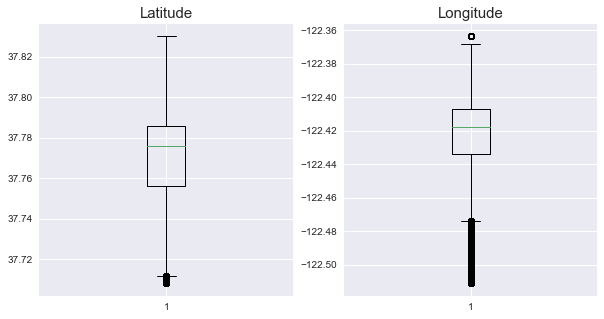

In [345]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.boxplot(data['Latitude'])
plt.title('Latitude', fontsize=15)

plt.subplot(1,2,2)
plt.boxplot(data['Longitude'])
plt.title('Longitude', fontsize=15)

plt.show()

In [346]:
import scipy
for col in ['Latitude', 'Longitude']:
    prop = data[col]
    IQR = scipy.stats.iqr(prop)

    Q1 = np.percentile(prop, 25)
    Q3 = np.percentile(prop, 75)
    
    n_O_upper = data[prop > (Q3 + 1.5 * IQR)].shape[0]
    n_O_lower = data[prop < (Q1 - 1.5 * IQR)].shape[0]
    
    outliers_per = (n_O_upper + n_O_lower) / data.shape[0]
    print('Outliers Percentage of',  prop.name, ':', outliers_per)

Outliers Percentage of Latitude : 0.010903294141442098
Outliers Percentage of Longitude : 0.06953943761676398


**=> Có thể không cần loại bỏ Outliers vì số lượng không đáng kể**

## Exploratory Data Analysis (EDA)

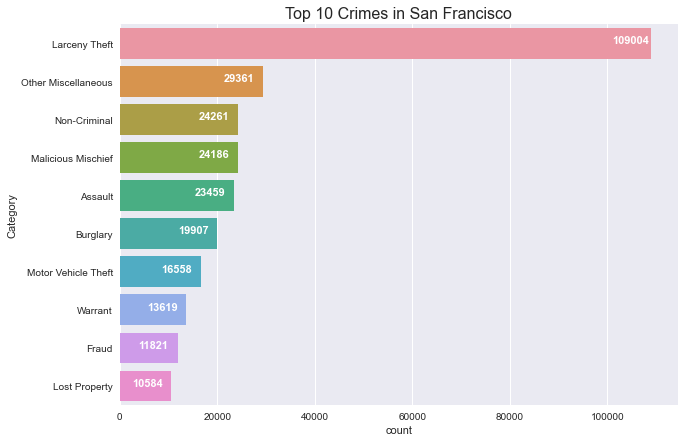

In [347]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(
    y = 'Category', 
    data = data, 
    order = data['Category'].value_counts()[:10].index
)

for rect in ax.patches:
    ax.text(
        rect.get_width() - 8000, 
        rect.get_y() + rect.get_height() / 2,
        rect.get_width(),
        color = 'white',
        weight = 'bold',
        fontsize = 11
    )
    
plt.title('Top 10 Crimes in San Francisco', fontsize=16)
plt.show()

**=> Nhiều tội phạm thuộc loại Larceny / Theft, cao hơn đáng kể so với bất kỳ loại tội phạm nào khác**

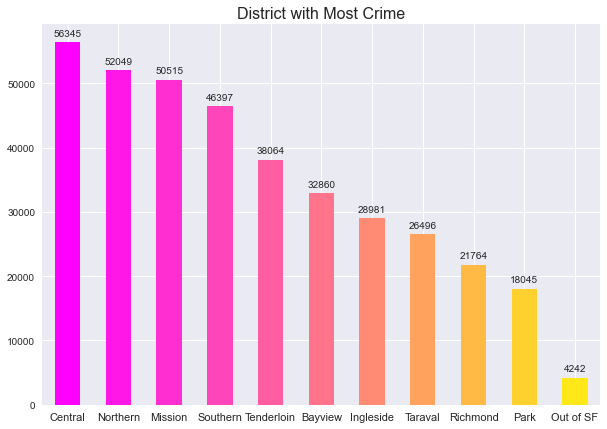

In [348]:
plt.figure(figsize=(10, 7))
color = plt.cm.spring(np.linspace(0, 1, 12))
ax = data['District'].value_counts().plot.bar(color=color)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        x = p.get_x() + p.get_width() / 2, 
        y = height + 1000, 
        s = height, 
        ha = 'center'
    )
    
plt.xticks(rotation=0, fontsize=11)
plt.title('District with Most Crime', fontsize=16)
plt.show()

**=> Quận Central là nơi ghi nhận nhiều tội phạm nhất và quận Park là nơi ít tội phạm nhất ở San Francisco**

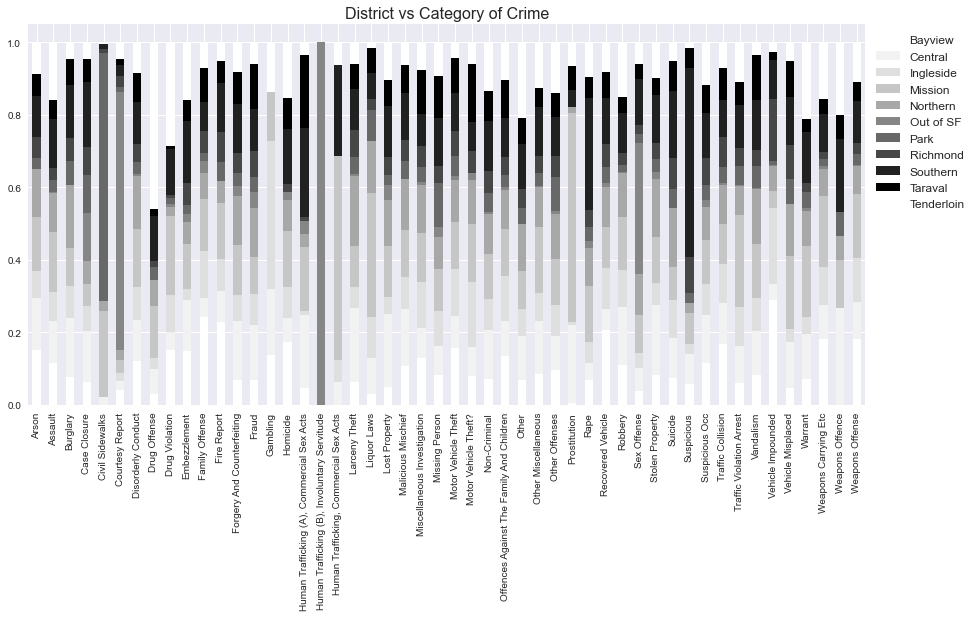

In [349]:
df = pd.crosstab(data['Category'], data['District'])
color = plt.cm.Greys(np.linspace(0, 1, 10))
df.div(df.sum(1).astype(float), axis=0).plot.bar(stacked=True, color=color, figsize=(15, 7))

plt.legend(loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
plt.xlabel('')

plt.title('District vs Category of Crime', fontsize=16)
plt.show()

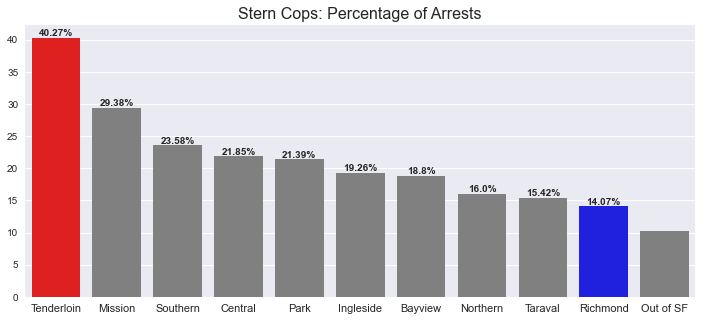

In [351]:
plt.figure(figsize = (12, 5))

arrest = data[data['Resolution'].isin(['Cite or Arrest Adult', 'Cite or Arrest Juvenile'])]
a = arrest['District'].value_counts().reset_index()
b = data['District'].value_counts().reset_index()

a = a.merge(b,how = 'inner', on = 'index')
a.columns = ['District', 'Arrests','Cases']

a['Arrests Percent'] = round(100 * a['Arrests'] / a['Cases'], 2)
a.sort_values('Arrests Percent', ascending = False, inplace = True)

sns.barplot(
    x = 'District', 
    y = 'Arrests Percent',
    data = a, 
    palette = ['red'] + ['grey'] * 8 + ['blue'] + ['grey']
)

for i in range(10):
    plt.text(
        x = i, 
        y = a['Arrests Percent'] .iloc[i], 
        s = f"{a['Arrests Percent'].iloc[i]}%",
        horizontalalignment = 'center', 
        verticalalignment = 'bottom',
        weight = 'bold'
    )

plt.xticks(fontsize=11)    
plt.xlabel('')
plt.ylabel('')

plt.title('Stern Cops: Percentage of Arrests', fontsize=16)
plt.show()

**=> Mặc dù có ít tội phạm hơn được ghi nhận ở quận Tenderlion nhưng tỷ lệ bắt giữ ở đây rất cao 40,27%**

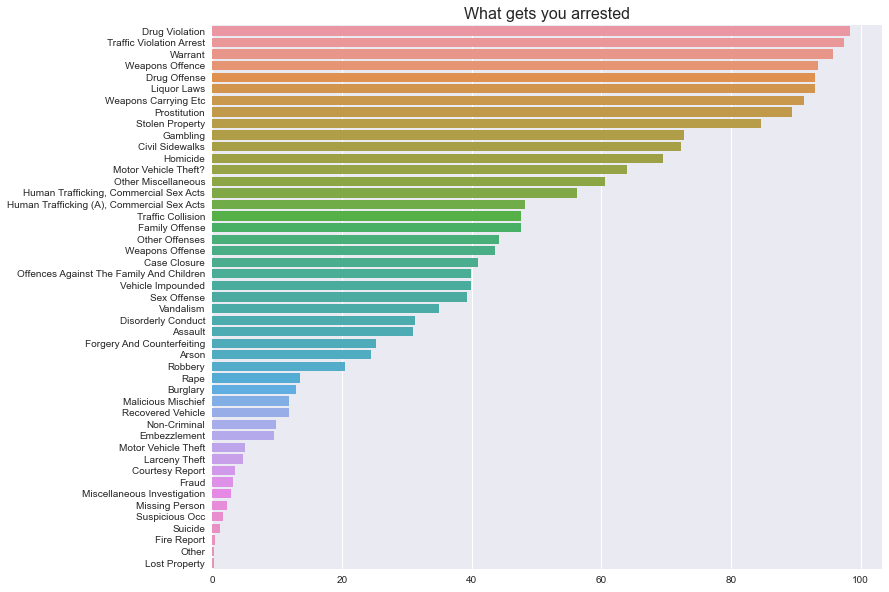

In [352]:
plt.figure(figsize = (12, 10))
a = arrest['Category'].value_counts().reset_index()
b = data['Category'].value_counts().reset_index()

a = a.merge(b, how='inner', on='index')
a.columns = ['Category', 'Arrests', 'Cases']

a['Arrests Percent'] = round(100 * (a['Arrests'] / a['Cases']), 2)
a.sort_values('Arrests Percent', ascending = False, inplace=True)

sns.barplot(x='Arrests Percent', y='Category', data=a)
plt.xlabel('')
plt.ylabel('')

plt.title('What gets you arrested', fontsize=16)
plt.show()

**=> Ma túy, vi phạm giao thông và lệnh bắt giữ là 3 lý do hàng đầu cho các vụ bắt giữ**

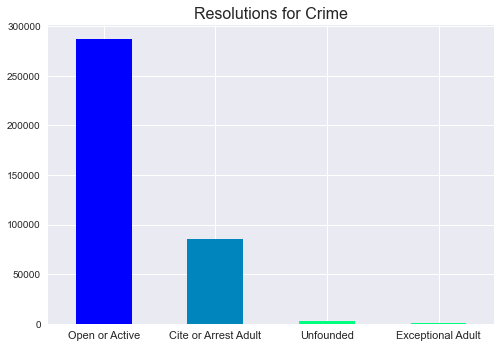

In [353]:
color = plt.cm.winter(np.linspace(0, 10, 20))
data['Resolution'].value_counts().plot.bar(color=color)

plt.xticks(rotation=0, fontsize=11)
plt.title('Resolutions for Crime',fontsize=16)
plt.show()

**=> Hầu hết các sự cố đều đang được tiến hành xử lý**

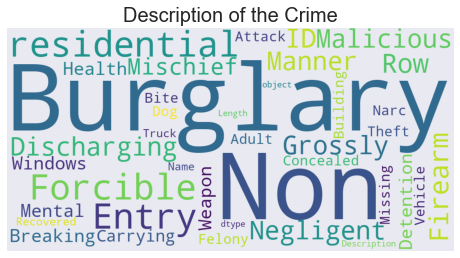

In [354]:
from wordcloud import WordCloud
wc = WordCloud(background_color='#e9eaf1', width=1000, height=500).generate(str(data['Description']))

plt.imshow(wc)
plt.axis('off')

plt.title('Description of the Crime', fontsize=20)
plt.show()

In [355]:
import plotly.express as px
discat = data.groupby(['District', 'Category'])['Description'].count().reset_index()
fig = px.sunburst(
    discat.rename(columns={'Description': 'Count'}), 
    path = ['District','Category'], 
    values = 'Count', 
    color = 'Count'
)
fig.show()

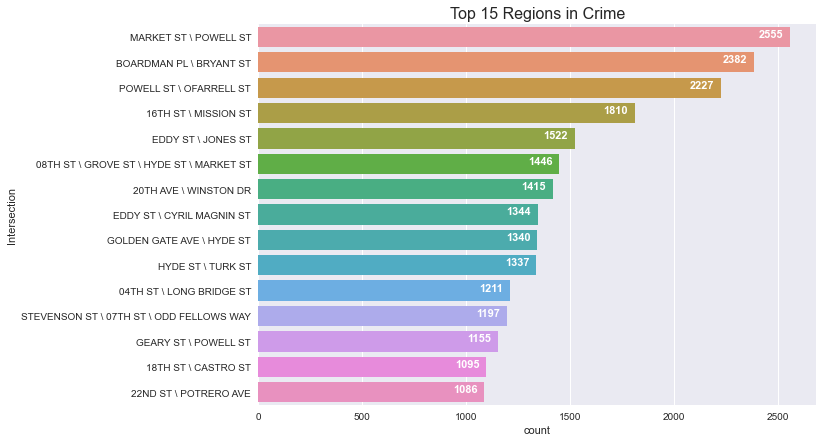

In [356]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(
    y = 'Intersection', 
    data = data, 
    order = data['Intersection'].value_counts()[:15].index
)

for rect in ax.patches:
    ax.text(
        rect.get_width() - 150, 
        rect.get_y() + rect.get_height() / 2,
        rect.get_width(),
        color = 'white',
        weight = 'bold', 
        fontsize = 11
    )
    
plt.title('Top 15 Regions in Crime', fontsize=16)
plt.show()

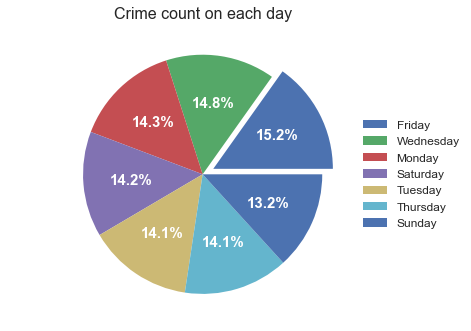

In [357]:
data['Weekday'].value_counts().plot.pie(
    explode = [0.1, 0, 0, 0, 0, 0, 0], 
    textprops = {'color': 'w', 'fontsize': 15, 'weight': 'bold'},
    autopct = "%.1f%%"
)

plt.legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
plt.axis('off')

plt.title('Crime count on each day', fontsize=16)
plt.show()

**=> Thứ 6 là ngày mà tội phạm được ghi nhận nhiều nhất, tiếp theo là Thứ 7. Chủ nhật là ngày ít tội phạm nhất**

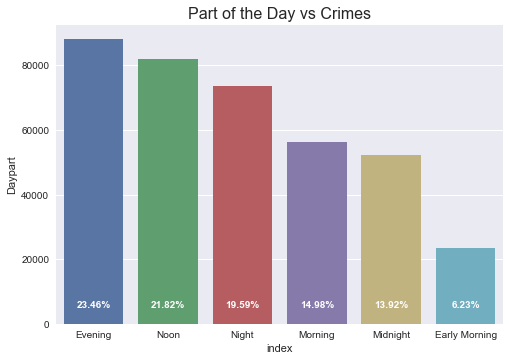

In [359]:
df = data['Daypart'].value_counts().reset_index()
df_normalize = data['Daypart'].value_counts(normalize=True)
sns.barplot(x=df['index'], y='Daypart', data=df)

for i in range(6):
     plt.text(
         x = i, 
         y = 5000, 
         s = f'{round(100 * df_normalize[i], 2)}%', 
         horizontalalignment = 'center', 
         color = 'white',
         weight = 'bold'
     )
        
plt.title('Part of the Day vs Crimes', fontsize=16)
plt.show()

**=> Hãy cẩn thận vào buổi tối. Gần 1/4 số vụ tội phạm xảy ra vào buổi tối**

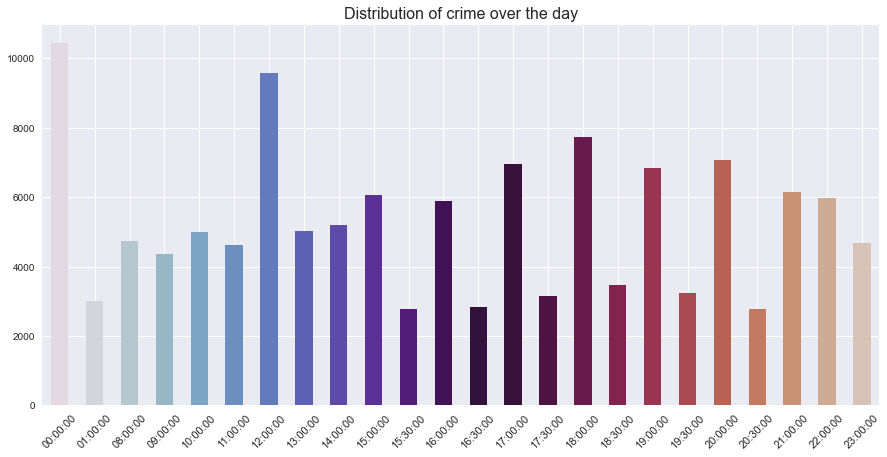

In [360]:
plt.figure(figsize=(15, 7))
color = plt.cm.twilight(np.linspace(0, 4, 100))
data['Datetime'].dt.time.value_counts().head(24).sort_index().plot.bar(color=color)

plt.xticks(rotation=45, fontsize=11)
plt.title('Distribution of crime over the day', fontsize=16)
plt.show()

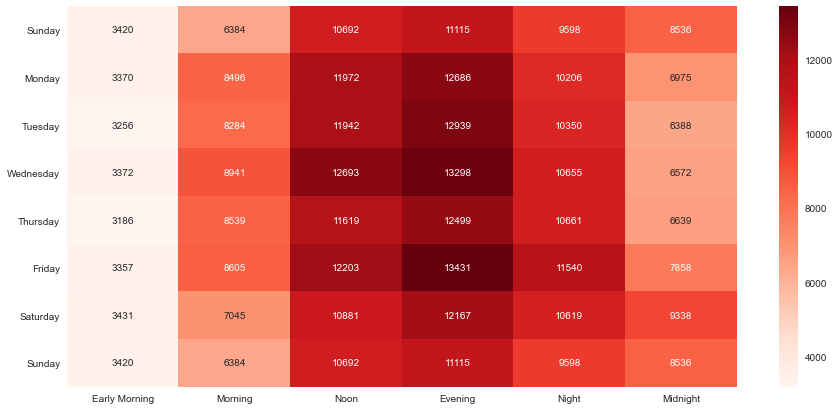

In [361]:
plt.figure(figsize = (15, 7))

pivot_table = pd.pivot_table(
    columns = data['Daypart'] ,
    index = 'Weekday',
    values = 'Daypart' , 
    aggfunc = 'count', 
    data = data
)

pivot_table = pivot_table.reindex(
    index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
    columns = ['Early Morning', 'Morning', 'Noon', 'Evening', 'Night', 'Midnight']
)

sns.heatmap(pivot_table, cmap='Reds', annot=True, fmt='d')
plt.xlabel('')
plt.ylabel('')
plt.show()

**=> Buổi tối thường là lúc có nhiều vụ phạm tội, tối Thứ 6 đặc biệt tồi tệ và tối Chủ nhật tương đối tốt hơn**

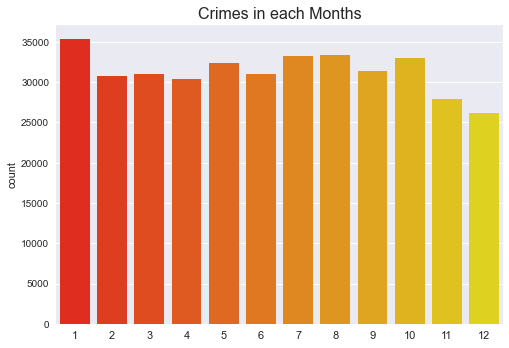

In [362]:
sns.countplot(data['Datetime'].dt.month, palette='autumn')
plt.xticks(fontsize=11)
plt.xlabel('')

plt.title('Crimes in each Months', fontsize=16)
plt.show()

**=> Tháng 1 là tháng có nhiều tội phạm nhất**

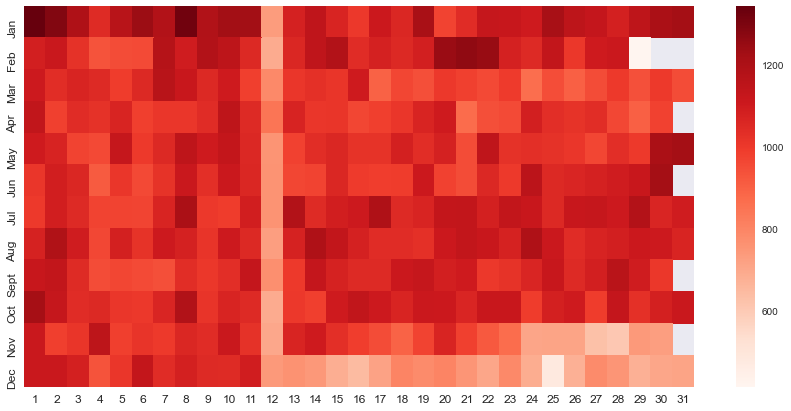

In [363]:
plt.figure(figsize = (15, 7))

df = data[['Datetime']]
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month

pivot_table = pd.pivot_table(
    columns = df.Day, 
    values = 'Day', 
    index = 'Month', 
    aggfunc = 'count', 
    data = df
)
sns.heatmap(pivot_table, cmap='Reds')

plt.xticks(fontsize = 12)
plt.yticks(
    np.arange(0.5, 12.5),
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
    fontsize = 12
)

plt.xlabel('')
plt.ylabel('')
plt.show()

**=> Ngày 1/1 dường như là ngày có số tội phạm được ghi nhận cao nhất và ngày 25/12 là ngày có số tội phạm được ghi nhận ít nhất. Ngoài ra có thể thấy ngày 12 trong năm là ngày khá an toàn so với phần lớn các ngày còn lại**

## Trực quan hóa không gian địa lý

In [364]:
table = data['District'].value_counts().reindex([
    "Central", 
    "Northern", 
    "Park", 
    "Southern", 
    "Mission", 
    "Tenderloin", 
    "Richmond", 
    "Taraval", 
    "Ingleside", 
    "Bayview"
])

table = table.reset_index().rename(
    {'index': 'District', 'District': 'Count'}, 
    axis='columns'
)

table['District'] = table['District'].str.upper()
table

,District,Count
0,CENTRAL,56345
1,NORTHERN,52049
2,PARK,18045
3,SOUTHERN,46397
4,MISSION,50515
5,TENDERLOIN,38064
6,RICHMOND,21764
7,TARAVAL,26496
8,INGLESIDE,28981
9,BAYVIEW,32860


In [365]:
import folium
gjson = r'https://cocl.us/sanfran_geojson'

figure = folium.Figure(width=900, height=600)
sf_map = folium.Map(location=[37.77, -122.42], zoom_start=12)
sf_map.choropleth(
    geo_data = gjson,
    data = table,
    columns = ['District', 'Count'],
    key_on = 'feature.properties.DISTRICT',
    fill_color = 'YlOrRd', 
    fill_opacity = 0.7, 
    line_opacity = 0.2,
    legend_name = 'Crime Rate in San Francisco'
)

figure.add_child(sf_map)
figure

In [366]:
%%html
<iframe 
    src="https://data.sfgov.org/dataset/Map-of-Police-Department-Incident-Reports-2018-to-/jq29-s5wp/embed?width=950&height=600" 
    width="950" 
    height="600" 
    style="border:0; padding: 0; margin: 0;"
></iframe>

# Step 3 : Model selection & Trainning

# Step 4: Evaluate & test the model results & performance

# Step 5: Deploy the model